In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K
from DataGenerator2D import DataGenerator2D
from Models import Resunet , Unet , Resunetpp
from Evaluation_matrices import iou, f1, dice_coef, dice_coef_loss
from Federated import scale_model_weights, sum_scaled_weights

# Load Data 

In [2]:
val_generator = DataGenerator2D('//PATH TO YOUR TEST DATA//', img_size=256,batch_size=128, shuffle=True)
X, y = val_generator.__getitem__(0)

# Lane Segmenetation Using Unet Model

In [3]:
unet = Unet()
ModelU = unet.build_model()
ModelU.load_weights('//PATH TO YOUR UNET MODEL WEIGHTS.h5//')
ModelU.compile(loss=dice_coef_loss,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=[f1, iou , dice_coef ])
evaluate = ModelU.evaluate(val_generator,batch_size= 60, verbose=1,)

3/3 [==============================] - 18s 4s/step - loss: 0.0726 - f1: 0.9216 - iou: 0.8888 - dice_coef: 0.9254


In [4]:
predict = ModelU.predict(X)

4/4 [==============================] - 2s 52ms/step


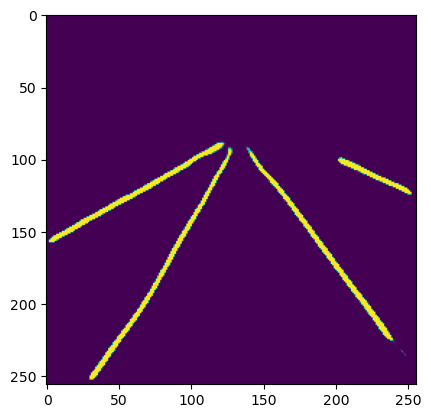

In [5]:
imgu = predict[2]
plt.imshow(imgu)

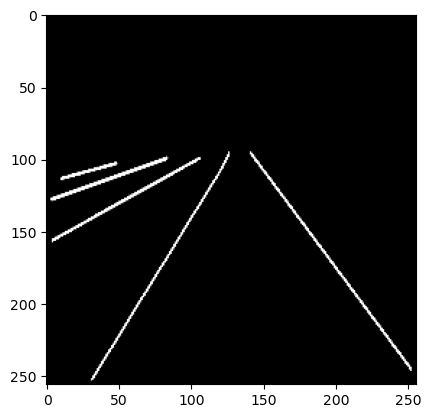

In [6]:
plt.imshow(y[2])

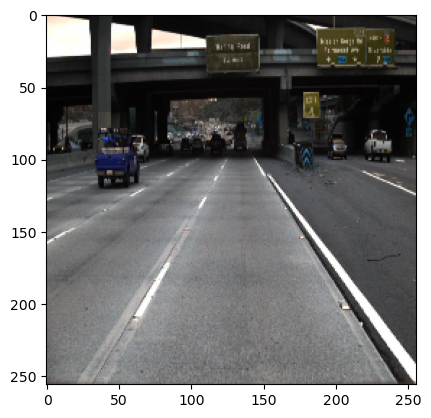

In [7]:
plt.imshow(X[2])

# Lane Segmenetation Using Federated Unet Model

In [3]:
unet = Unet()
ModelFU = unet.build_model()
ModelFU.load_weights('//PATH TO YOUR FEDERATED UNET MODEL WEIGHTS.h5//')
ModelFU.compile(loss=dice_coef_loss,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=[f1, iou , dice_coef ])
evaluate = ModelFU.evaluate(val_generator,batch_size= 60, verbose=1,)

3/3 [==============================] - 18s 4s/step - loss: 0.0504 - f1: 0.9443 - iou: 0.9303 - dice_coef: 0.9470


In [4]:
predict = ModelFU.predict(X)

4/4 [==============================] - 2s 52ms/step


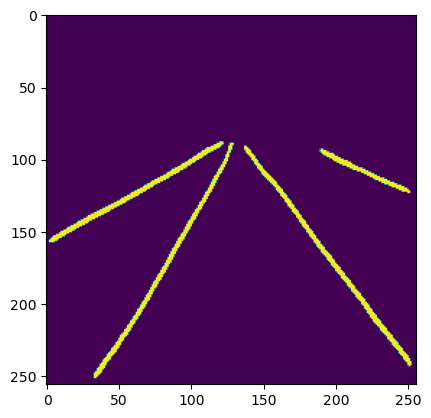

In [5]:
imgfu = predict[2]
plt.imshow(imgfu)

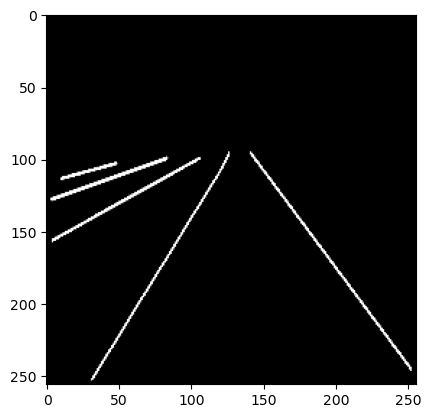

In [6]:
plt.imshow(y[2])

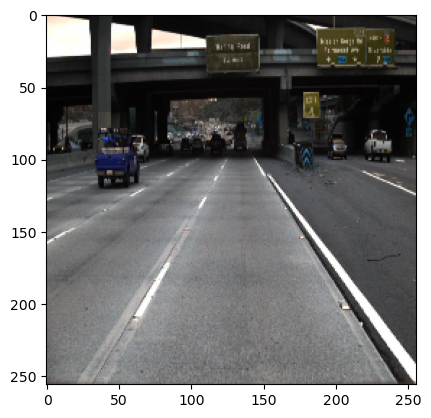

In [7]:
plt.imshow(X[2])

# Lane Segmenetation Using Resunet Model

In [3]:
Resunet = Resunet()
modelR = Resunet.build_model()
modelR.load_weights('//PATH TO YOUR RESUNET MODEL WEIGHTS.h5//')
modelR.compile(loss=dice_coef_loss,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=[f1, iou , dice_coef ])
evaluate = modelR.evaluate(val_generator,batch_size= 60, verbose=1,)

3/3 [==============================] - 15s 3s/step - loss: 0.0571 - f1: 0.9372 - iou: 0.9195 - dice_coef: 0.9404


In [4]:
predict = modelR.predict(X)

4/4 [==============================] - 2s 189ms/step


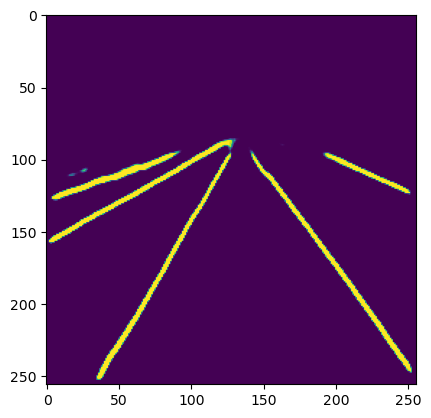

In [5]:
imgr = predict[2]
plt.imshow(imgr)

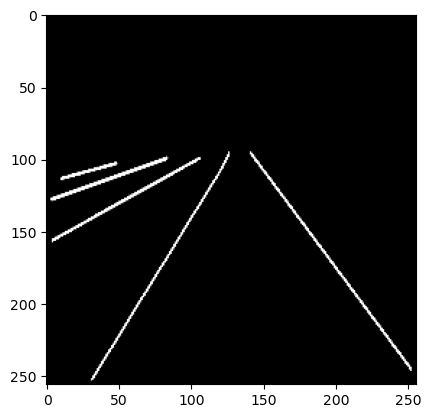

In [6]:
plt.imshow(y[2])

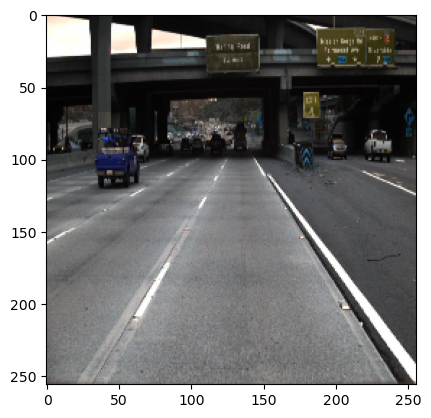

In [7]:
plt.imshow(X[2])

# Lane Segmenetation Using Federadted Resunet Model

In [3]:
Resunet = Resunet()
modelFR = Resunet.build_model()
modelFR.load_weights('//PATH TO YOUR FEDERATED RESUNET MODEL WEIGHTS.h5//')
modelFR.compile(loss=dice_coef_loss,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=[f1, iou , dice_coef ])
evaluate = modelFR.evaluate(val_generator,batch_size= 60, verbose=1,)

3/3 [==============================] - 15s 3s/step - loss: 0.0263 - f1: 0.9695 - iou: 0.9781 - dice_coef: 0.9719


In [4]:
predict = modelFR.predict(X)

4/4 [==============================] - 2s 190ms/step


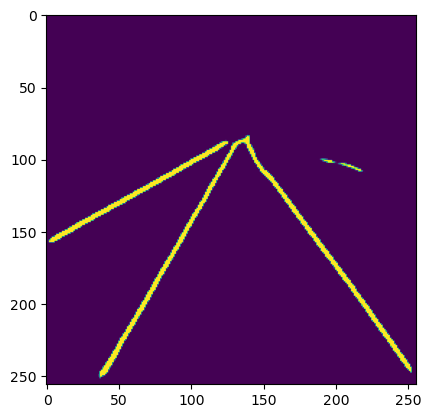

In [5]:
imgfr = predict[2]
plt.imshow(imgfr)

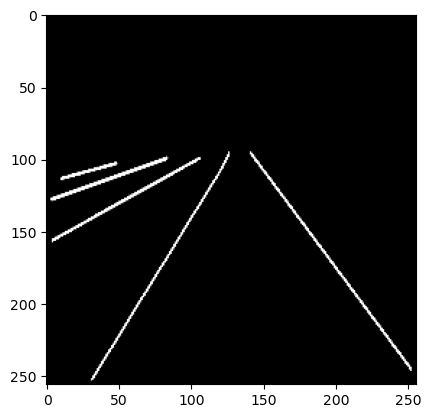

In [6]:
plt.imshow(y[2])

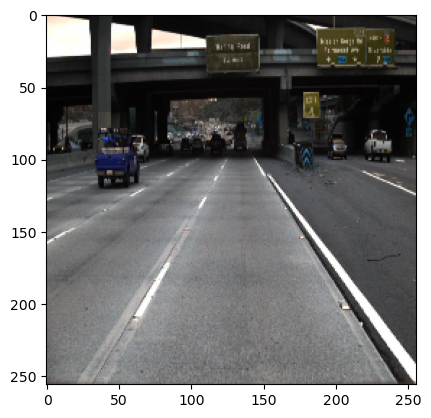

In [7]:
plt.imshow(X[2])

# Lane Segmenetation Using Resunetpp Model

In [3]:
Resunetpp = Resunetpp()
modelRpp = Resunetpp.build_model()
modelRpp.load_weights('//PATH TO YOUR RESUNET++ MODEL WEIGHTS.h5//')
modelRpp.compile(loss=dice_coef_loss,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=[f1, iou , dice_coef ])
evaluate = modelRpp.evaluate(val_generator,batch_size= 60, verbose=1,)

3/3 [==============================] - 20s 4s/step - loss: 0.1001 - f1: 0.8939 - iou: 0.8427 - dice_coef: 0.8982


In [4]:
predict = modelRpp.predict(X)

4/4 [==============================] - 3s 273ms/step


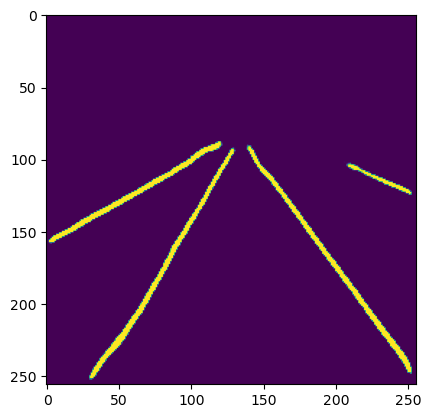

In [5]:
imgrp = predict[2]
plt.imshow(imgrp)

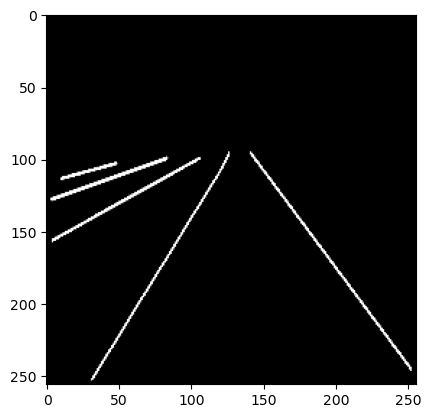

In [6]:
plt.imshow(y[2])

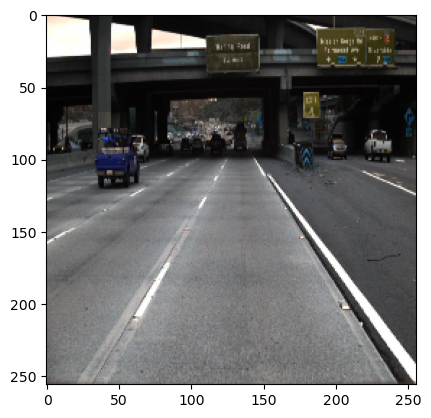

In [7]:
plt.imshow(X[2])

# Lane Segmenetation Using Federated Resunetpp Model

In [3]:
Resunetpp = Resunetpp()
modelFRpp = Resunetpp.build_model()
modelFRpp.load_weights('//PATH TO YOUR FEDERATED RESUNET++ MODEL WEIGHTS.h5//')
modelFRpp.compile(loss=dice_coef_loss,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=[f1, iou , dice_coef ])
evaluate = modelFRpp.evaluate(val_generator,batch_size= 60, verbose=1,)

3/3 [==============================] - 20s 4s/step - loss: 0.0346 - f1: 0.9606 - iou: 0.9631 - dice_coef: 0.9639


In [4]:
predict = modelFRpp.predict(X)

4/4 [==============================] - 3s 273ms/step


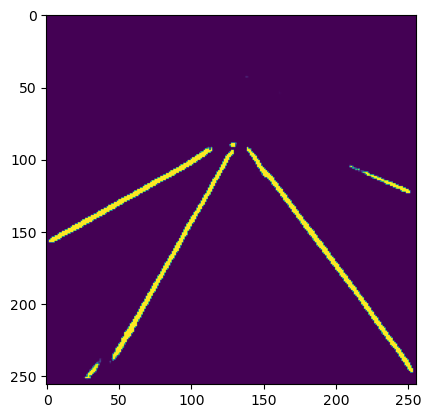

In [5]:
imgfrp = predict[2]
plt.imshow(imgfrp)

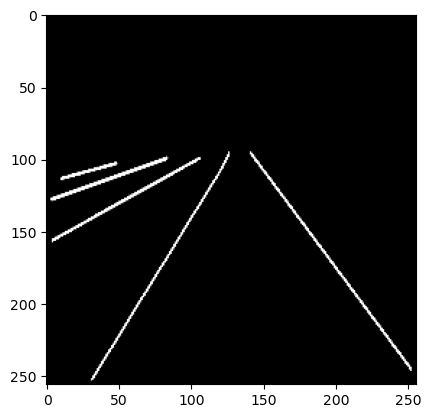

In [6]:
plt.imshow(y[2])

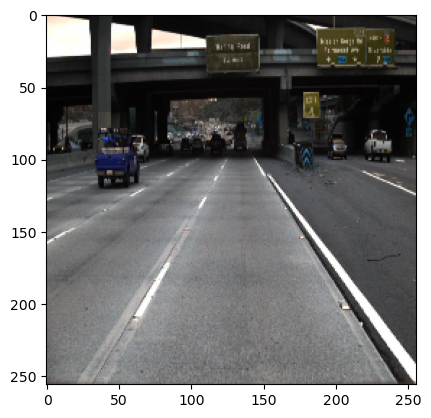

In [7]:
plt.imshow(X[2])